# Types of Recommender Systems
## A) Content-Based Movie Recommendation Systems:
***Content-based*** methods are based on the similarity of movie attributes. Using this type of recommender system, if a user watches one movie, similar movies are recommended. For example, if a user watches a comedy movie starring Adam Sandler, the system will recommend them movies in the same genre or starring the same actor, or both. 


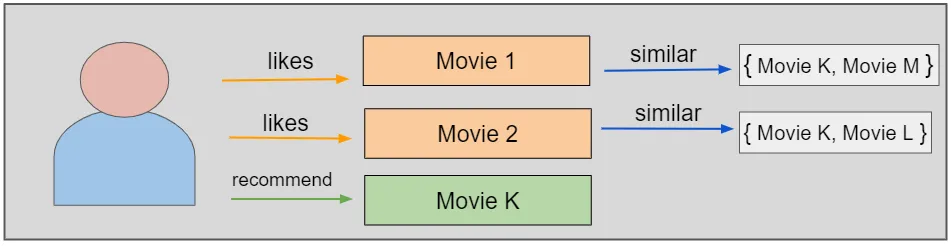

## B) Collaborative Filtering Movie Recommendation Systems:
With ***collaborative filtering***, the system is based on past interactions between users and movies.
For example, if user A watches M1, M2, and M3, and user B watches M1, M3, M4, we recommend M1 and M3 to a similar user C.

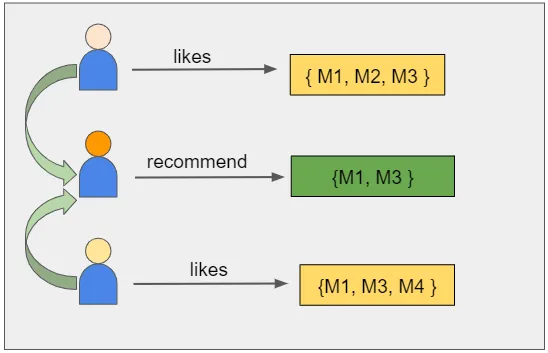

## C) Hybrid Recommendation System
A ***hybrid*** recommendation system is a special type of recommendation system which can be considered as the combination of the content and collaborative filtering method. 

## We will use Content-Based Movie Recommendation Systems

In [1]:
import pandas as pd
import numpy as np
import ast
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
from IPython.display import Image
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

***Data loading***
- id - A unique identifier for each movie.
- title - Title of the movie.
- overview - A brief description of the movie.
- poster_path - Poster of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- release_date - The date on which it was released.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.
- original_language - The language in which the movie was made.

- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

- genre - The genre of the movie, Action, Comedy ,Thriller etc.

- keywords - The keywords or tags related to the movie.

In [2]:
movies = pd.read_csv('DATA/movies.csv')
credits = pd.read_csv('DATA/credits.csv')
genres = pd.read_csv('DATA/genres.csv')
keywords = pd.read_csv('DATA/keywords.csv')

In [9]:
print(movies.shape)
print(credits.shape)
print(genres.shape)
print(keywords.shape)

(10000, 9)
(10000, 4)
(10000, 3)
(10000, 3)


In [5]:
movies.head(2)

,Unnamed: 0,id,title,overview,poster_path,popularity,release_date,vote_average,original_language
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,123.773,1972-03-14,8.7,en
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,132.698,1994-09-23,8.7,en


In [6]:
credits.head(2)

,Unnamed: 0,id,cast,crew
0,0,238,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."


In [7]:
genres.head(2)

,Unnamed: 0,genres,id
0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",238
1,1,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",278


In [8]:
keywords.head(2)

,Unnamed: 0,id,keywords
0,0,238,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na..."
1,1,278,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n..."


In [12]:
# merge all the dataframe using id
movies_df = movies.merge(genres , on='id').merge(keywords ,on='id').merge(credits , on='id')

C:\Users\Satya\AppData\Local\Temp\ipykernel_8372\2576068393.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  movies_df = movies.merge(genres , on='id').merge(keywords ,on='id').merge(credits , on='id')


In [13]:
movies_df.head()

,Unnamed: 0_x,id,title,overview,poster_path,popularity,release_date,vote_average,original_language,Unnamed: 0_y,genres,Unnamed: 0_x,keywords,Unnamed: 0_y,cast,crew
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,123.773,1972-03-14,8.7,en,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",0,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...",0,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,132.698,1994-09-23,8.7,en,1,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",1,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,/bMadFzhjy9T7R8J48QGq1ngWNAK.jpg,91.909,1974-12-20,8.6,en,2,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2,"[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",2,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,61.483,1993-12-15,8.6,en,3,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",3,"[{'id': 818, 'name': 'based on novel or book'}...",3,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."
4,4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,52.514,1995-10-20,8.6,hi,4,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,"[{'id': 2783, 'name': ""family's daily life""}, ...",4,"[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."


In [14]:
len(movies_df)

10000

# Preprocessing

### filter essential cols

In [15]:
# id  , title , overview , genres , keywords , cast , crew

movies_df = movies_df[['id' , 'title' , 'overview' , 'genres' , 'keywords' , 'cast' ,'crew']]

In [16]:
movies_df.head()

,id,title,overview,genres,keywords,cast,crew
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...","[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...","[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 818, 'name': 'based on novel or book'}...","[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."
4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 2783, 'name': ""family's daily life""}, ...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."


### check missing values

In [17]:
movies_df.isnull().sum()

id          0
title       0
overview    2
genres      0
keywords    0
cast        0
crew        0
dtype: int64

### drop null values

In [22]:
movies_df.dropna(inplace=True)

C:\Users\Satya\AppData\Local\Temp\ipykernel_8372\191851754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.dropna(inplace=True)


### Extract name from genres and keywords cols

In [26]:
movies_df['genres'][0]

"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}]"

In [27]:
type(movies_df['genres'][0])

str

In [29]:
# this is str to iterate them we need to convert it into list

In [45]:
def fetch_genres_keywords(obj):
    name = []
    for i in ast.literal_eval(obj):
        name.append(i['name'])
    return name

In [47]:
# fetch genres name 
movies_df['genres'] = movies_df['genres'].apply(fetch_genres_keywords)

In [48]:
# fetch keywords name 
movies_df['keywords'] = movies_df['keywords'].apply(fetch_genres_keywords)

### now we'll extract top 5 cast from the cast col

In [62]:
def extract_cast_name(obj):
    cast_name = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter < 5: 
            cast_name.append(i['name'])
            counter+=1
        else:
            break
    return cast_name

In [68]:
# fetch cast name 
movies_df['cast'] = movies_df['cast'].apply(extract_cast_name)

### now we'll extract director name from crew col

In [75]:
def extract_director_name(obj):
    director_name = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            director_name.append(i['name'])
            break
    return director_name

In [80]:
# fetch diretor name
movies_df['director'] = movies_df['crew'].apply(extract_director_name)

In [81]:
movies_df.head()

,id,title,overview,genres,keywords,cast,crew,director
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[Drama, Crime]","[italy, loss of loved one, love at first sight...","[Marlon Brando, Al Pacino, James Caan, Robert ...","[{'adult': False, 'gender': 2, 'id': 154, 'kno...",[Francis Ford Coppola]
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"[Drama, Crime]","[prison, corruption, police brutality, based o...","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...","[{'adult': False, 'gender': 2, 'id': 153, 'kno...",[Frank Darabont]
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[Drama, Crime]","[italy, italian american, cuba, symbolism, gan...","[Al Pacino, Robert Duvall, Diane Keaton, Rober...","[{'adult': False, 'gender': 2, 'id': 154, 'kno...",[Francis Ford Coppola]
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"[Drama, History, War]","[based on novel or book, factory, concentratio...","[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car...","[{'adult': False, 'gender': 2, 'id': 491, 'kno...",[Steven Spielberg]
4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","[Comedy, Drama, Romance]","[family's daily life, family history, love-hat...","[Shah Rukh Khan, Kajol, Amrish Puri, Anupam Kh...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn...",[Aditya Chopra]


In [83]:
# lets overview col also convert into a list bcz add all the list cols and create a new col called tags
movies_df['overview'] = movies_df['overview'].apply(lambda x : x.split())

#### here we'll do one thing remove space bet same word like "Sam Worthington" to "SamWorthington" bcz of with space our model treated as two entity one is Sam and second one is Worthington .¶

In [84]:
def remove_space(obj):
    
    a = []
    for word in obj:
        b = "".join(word.split())
        a.append(b)
    return a

In [87]:
movies_df['genres'] = movies_df['genres'].apply(remove_space)
movies_df['keywords'] = movies_df['keywords'].apply(remove_space)
movies_df['cast'] = movies_df['cast'].apply(remove_space)
movies_df['director'] = movies_df['director'].apply(remove_space)

In [88]:
movies_df.head()

,id,title,overview,genres,keywords,cast,crew,director
0,238,The Godfather,"[Spanning, the, years, 1945, to, 1955,, a, chr...","[Drama, Crime]","[italy, lossoflovedone, loveatfirstsight, base...","[MarlonBrando, AlPacino, JamesCaan, RobertDuva...","[{'adult': False, 'gender': 2, 'id': 154, 'kno...",[FrancisFordCoppola]
1,278,The Shawshank Redemption,"[Framed, in, the, 1940s, for, the, double, mur...","[Drama, Crime]","[prison, corruption, policebrutality, basedonn...","[TimRobbins, MorganFreeman, BobGunton, William...","[{'adult': False, 'gender': 2, 'id': 153, 'kno...",[FrankDarabont]
2,240,The Godfather Part II,"[In, the, continuing, saga, of, the, Corleone,...","[Drama, Crime]","[italy, italianamerican, cuba, symbolism, gang...","[AlPacino, RobertDuvall, DianeKeaton, RobertDe...","[{'adult': False, 'gender': 2, 'id': 154, 'kno...",[FrancisFordCoppola]
3,424,Schindler's List,"[The, true, story, of, how, businessman, Oskar...","[Drama, History, War]","[basedonnovelorbook, factory, concentrationcam...","[LiamNeeson, BenKingsley, RalphFiennes, Caroli...","[{'adult': False, 'gender': 2, 'id': 491, 'kno...",[StevenSpielberg]
4,19404,Dilwale Dulhania Le Jayenge,"[Raj, is, a, rich,, carefree,, happy-go-lucky,...","[Comedy, Drama, Romance]","[family'sdailylife, familyhistory, love-hatere...","[ShahRukhKhan, Kajol, AmrishPuri, AnupamKher, ...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn...",[AdityaChopra]


### now we'll concate genres to crew col and create a new col called tags and then covert tags col list to str

In [89]:
movies_df['tags'] = movies_df['genres'] + movies_df['overview'] + movies_df['keywords'] + movies_df['cast'] + movies_df['director']

In [91]:
movies_df['tags'] = movies_df['tags'].apply(lambda x : " ".join(x))

In [95]:
def text_preprocessing(text):
    
    # lower case
    text = text.lower()
    
    # tokenization
    text = word_tokenize(text)
    
    # remove stopwords and punctuation
    a = []
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            a.append(word)
    text = a[:]
    a.clear()
    
    # Stemming
    ps = PorterStemmer() 
    for word in text:
        stem = ps.stem(word)
        a.append(stem)
    text = a[:]
    a.clear()
    
    # removing special char
    for i in text:            
        if i.isalnum():
            a.append(i)
    text = a[:]
    a.clear()
    
    return " ".join(text)

In [97]:
movies_df['tags'] = movies_df['tags'].apply(text_preprocessing)

In [99]:
movies_final = movies_df[['id' , 'title' , 'tags']]

In [100]:
movies_final.head(2)

,id,title,tags
0,238,The Godfather,drama crime span year 1945 1955 chronicl ficti...
1,278,The Shawshank Redemption,drama crime frame 1940 doubl murder wife lover...


#### Now we will find cosine similarity bet all the word

## Cosine Similarity Explained :
- A cosine similarity is a value that is bound by a constrained range of 0 and 1. The closer the value is to 0 means that the two vectors are orthogonal or perpendicular to each other. When the value is closer to one, it means the angle is smaller and the images are more similar. 

### Formula:
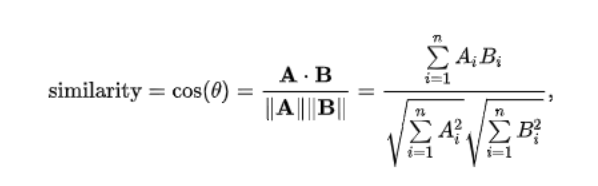

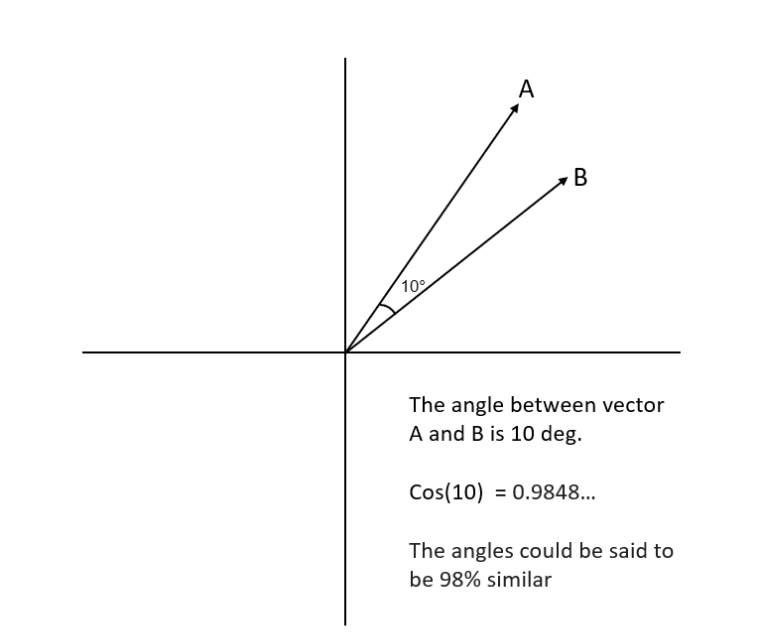

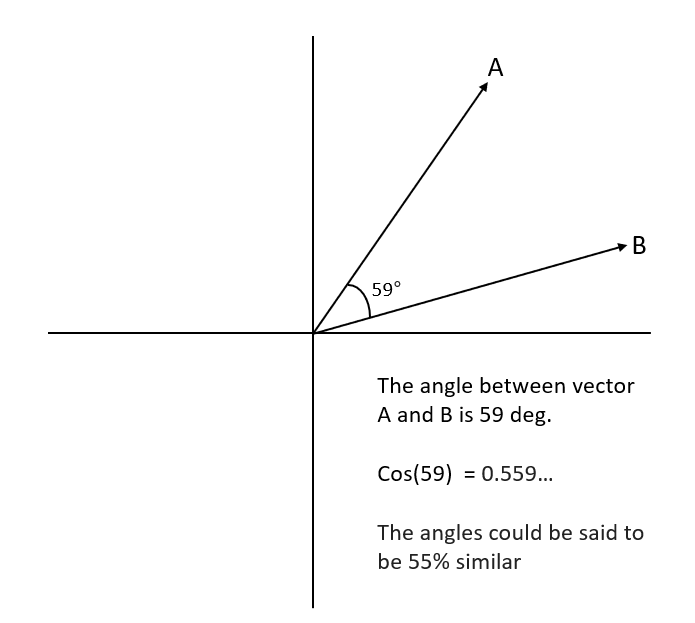

## convert into vector

### 1.BOW

In [101]:
cv = CountVectorizer()
tags_vector = cv.fit_transform(movies_final['tags']).toarray()

In [102]:
similarity1 = cosine_similarity(tags_vector)

In [103]:
similarity1[0].shape # this is similarity score bet 1 movie to others 9997 movies.

(9998,)

### now we'll create a recommended function and extract top 6 similar movies

In [137]:
def recommended_movies(movie_name):
    # to get movie index 
    movie_index = movies_df[movies_df['title']==movie_name].index[0]
    
    # find reccomended movies index and score
    similar_movies = sorted(list(enumerate(similarity1[movie_index])) , reverse=True , key=lambda x : x[1])[1:7]
    
    # print movies name using index
    recommended_movies = []
    for i in similar_movies:
        recc_indx = i[0]
        recommended_movies.append(movies_final['title'].iloc[recc_indx])
    
    return recommended_movies

In [138]:
recommended_movies('Independence Day')

['Attraction',
 'Escape from Planet Earth',
 'Rim of the World',
 'Predators',
 'The 5th Wave',
 'Alien']

In [141]:
recommended_movies('Avatar')

['Aliens in the Attic',
 'Avatar: The Way of Water',
 'Aliens',
 'Titan A.E.',
 'Rim of the World',
 'Predators']

In [145]:
recommended_movies('The Avengers')

['Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Captain America: Civil War',
 'Avengers: Infinity War',
 'Thor: Ragnarok',
 'Captain America: The First Avenger']

### now using max_feature = 5000

In [140]:
cv = CountVectorizer(max_features=5000)
tags_vector = cv.fit_transform(movies_final['tags']).toarray()
similarity2 = cosine_similarity(tags_vector)

In [146]:
def recommended_movies(movie_name):
    # to get movie index 
    movie_index = movies_df[movies_df['title']==movie_name].index[0]
    
    # find reccomended movies index and score
    similar_movies = sorted(list(enumerate(similarity2[movie_index])) , reverse=True , key=lambda x : x[1])[1:7]
    
    # print movies name using index
    recommended_movies = []
    for i in similar_movies:
        recc_indx = i[0]
        recommended_movies.append(movies_final['title'].iloc[recc_indx])
    
    return recommended_movies

In [147]:
recommended_movies('Independence Day')

['Attraction',
 'G.O.R.A.',
 'Rim of the World',
 'Escape from Planet Earth',
 'Ben 10: Race Against Time',
 'The 5th Wave']

In [148]:
recommended_movies('Avatar')

['Aliens in the Attic',
 'Valerian and the City of a Thousand Planets',
 'Rim of the World',
 'Final Fantasy: The Spirits Within',
 'Aliens',
 'Attraction']

In [149]:
recommended_movies('The Avengers')

['Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Thor: Ragnarok',
 'Avengers: Infinity War',
 'Captain America: Civil War',
 'Marvel One-Shot: Item 47']

### now using max_feature = 10000

In [150]:
cv = CountVectorizer(max_features=10000)
tags_vector = cv.fit_transform(movies_final['tags']).toarray()
similarity3 = cosine_similarity(tags_vector)

In [151]:
cv = CountVectorizer(max_features=10000)
tags_vector = cv.fit_transform(movies_final['tags']).toarray()
similarity3 = cosine_similarity(tags_vector)

In [152]:
recommended_movies('Independence Day')

['Attraction',
 'Rim of the World',
 'G.O.R.A.',
 'Escape from Planet Earth',
 'Ben 10: Race Against Time',
 'Stargate: Continuum']

In [153]:
recommended_movies('Avatar')

['Aliens in the Attic',
 'Avatar: The Way of Water',
 'Aliens',
 'Rim of the World',
 'Attraction',
 'Titan A.E.']

In [154]:
recommended_movies('The Avengers')

['Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Thor: Ragnarok',
 'Captain America: Civil War',
 'Avengers: Infinity War',
 'Captain America: The First Avenger']

### now using max_feature = 15000

In [160]:
cv = CountVectorizer(max_features=15000)
tags_vector = cv.fit_transform(movies_final['tags']).toarray()
similarity3 = cosine_similarity(tags_vector)

In [161]:
def recommended_movies(movie_name):
    # to get movie index 
    movie_index = movies_df[movies_df['title']==movie_name].index[0]
    
    # find reccomended movies index and score
    similar_movies = sorted(list(enumerate(similarity3[movie_index])) , reverse=True , key=lambda x : x[1])[1:7]
    
    # print movies name using index
    recommended_movies = []
    for i in similar_movies:
        recc_indx = i[0]
        recommended_movies.append(movies_final['title'].iloc[recc_indx])
    
    return recommended_movies

In [162]:
recommended_movies('Independence Day')

['Attraction',
 'Rim of the World',
 'Escape from Planet Earth',
 'G.O.R.A.',
 'Stargate: Continuum',
 'Predators']

In [163]:
recommended_movies('Avatar')

['Aliens in the Attic',
 'Avatar: The Way of Water',
 'Aliens',
 'Rim of the World',
 'Titan A.E.',
 'Valerian and the City of a Thousand Planets']

In [164]:
recommended_movies('The Avengers')

['Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Thor: Ragnarok',
 'Captain America: Civil War',
 'Avengers: Infinity War',
 'Captain America: The First Avenger']

### 2.TFIDF

In [165]:
tfidf = TfidfVectorizer()
tags_vector = tfidf.fit_transform(movies_final['tags']).toarray()
similarity4 = cosine_similarity(tags_vector)

In [166]:
def recommended_movies(movie_name):
    # to get movie index 
    movie_index = movies_df[movies_df['title']==movie_name].index[0]
    
    # find reccomended movies index and score
    similar_movies = sorted(list(enumerate(similarity4[movie_index])) , reverse=True , key=lambda x : x[1])[1:7]
    
    # print movies name using index
    recommended_movies = []
    for i in similar_movies:
        recc_indx = i[0]
        recommended_movies.append(movies_final['title'].iloc[recc_indx])
    
    return recommended_movies

In [167]:
recommended_movies('Independence Day')

['Attraction',
 'Alien',
 'Escape from Planet Earth',
 'Predators',
 'The Gendarme and the Creatures from Outer Space',
 'Close Encounters of the Third Kind']

In [168]:
recommended_movies('Avatar')

['Avatar: The Way of Water',
 'Aliens',
 'Predators',
 'Aliens in the Attic',
 'Alien Nation',
 'Titan A.E.']

In [169]:
recommended_movies('The Avengers')

['Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Avengers: Infinity War',
 'Team Thor',
 'Captain America: Civil War',
 'Spider-Man: Far From Home']

In [170]:
tfidf = TfidfVectorizer(max_features=10000)
tags_vector = tfidf.fit_transform(movies_final['tags']).toarray()
similarity5 = cosine_similarity(tags_vector)

In [171]:
def recommended_movies(movie_name):
    # to get movie index 
    movie_index = movies_df[movies_df['title']==movie_name].index[0]
    
    # find reccomended movies index and score
    similar_movies = sorted(list(enumerate(similarity5[movie_index])) , reverse=True , key=lambda x : x[1])[1:7]
    
    # print movies name using index
    recommended_movies = []
    for i in similar_movies:
        recc_indx = i[0]
        recommended_movies.append(movies_final['title'].iloc[recc_indx])
    
    return recommended_movies

In [172]:
recommended_movies('Independence Day')

['Attraction',
 'G.O.R.A.',
 'Stargate: Continuum',
 'Ben 10: Race Against Time',
 'Escape from Planet Earth',
 'Rim of the World']

In [173]:
recommended_movies('Avatar')

['Avatar: The Way of Water',
 'Aliens',
 'Aliens in the Attic',
 'Alien Nation',
 'Rakka',
 'Predators']

In [174]:
recommended_movies('The Avengers')

['Avengers: Age of Ultron',
 'Avengers: Endgame',
 'Team Thor',
 'Avengers: Infinity War',
 'Marvel One-Shot: The Consultant',
 'Captain America: Civil War']

In [175]:
import pickle
pickle.dump(similarity1 , open('similarity.pkl','wb'))

In [176]:
pickle.dump(movies_final , open('movies.pkl' , 'wb'))

***Now extract Popular movies based on popularity***

In [3]:
movies.sort_values("popularity" , ascending=False).head(25)

,Unnamed: 0,id,title,overview,poster_path,popularity,release_date,vote_average,original_language,vote_average.1,vote_count,release_date.1
674,674,976573,Elemental,"In a city where fire, water, land and air resi...",/8riWcADI1ekEiBguVB9vkilhiQm.jpg,4411.076,2023-06-14,7.8,en,7.8,1500,2023-06-14
3891,3891,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,/FQHtuf2zc8suMFE28RyvFt3FJN.jpg,3247.593,2023-08-02,6.9,en,6.9,828,2023-08-02
3826,3826,724209,Heart of Stone,An intelligence operative for a shadowy global...,/vB8o2p4ETnrfiWEgVxHmHWP9yRl.jpg,2899.650,2023-08-09,6.9,en,6.9,824,2023-08-09
1460,1460,667538,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,2030.046,2023-06-06,7.5,en,7.5,2961,2023-06-06
21,21,569094,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyn’s fu...",/8Vt6mWEReuy4Of61Lnj5Xj704m8.jpg,1872.207,2023-05-31,8.4,en,8.4,3811,2023-05-31
1778,1778,346698,Barbie,Barbie and Ken are having the time of their li...,/iuFNMS8U5cb6xfzi51Dbkovj7vM.jpg,1869.493,2023-07-19,7.4,en,7.4,3433,2023-07-19
3856,3856,298618,The Flash,When his attempt to save his family inadverten...,/rktDFPbfHfUbArZ6OOOKsXcv0Bm.jpg,1830.716,2023-06-13,7.0,en,7.0,2553,2023-06-13
4953,4953,709631,Cobweb,Eight year old Peter is plagued by a mysteriou...,/cGXFosYUHYjjdKrOmA0bbjvzhKz.jpg,1646.909,2023-07-19,6.8,en,6.8,230,2023-07-19
2219,2219,385687,Fast X,Over many missions and against impossible odds...,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,1479.399,2023-05-17,7.3,en,7.3,3498,2023-05-17
2953,2953,884605,No Hard Feelings,"On the brink of losing her childhood home, Mad...",/gD72DhJ7NbfxvtxGiAzLaa0xaoj.jpg,1362.424,2023-06-15,7.1,en,7.1,941,2023-06-15


## Demographic Filtering
- we need a metric to score or rate movie
- Calculate the score for every movie
- Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

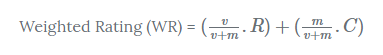

where,

- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

In [5]:
C= movies['vote_average'].mean()
C

6.77442

- The next step is to choose a suitable value for m, the minimum number of votes necessary to appear in the chart.
- Our cutoff will be the 90th percentile. In other words, a film must receive more votes than at least 90% of the other films on the list in order to be in the charts.

In [6]:
m= movies['vote_count'].quantile(0.9)
m

4117.4000000000015

In [20]:
new_movies = movies[movies['vote_count']>m]
new_movies.shape

(1000, 12)

- We see that there are 1000 movies which qualify to be in this list.
- Now, we need to calculate our metric for each qualified movie.
- To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [23]:
def weighted_rating(df , m=m , C=C):
    v = df['vote_count']
    R = df['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [24]:
new_movies['score'] = new_movies.apply(weighted_rating, axis=1)

new_movies.head(5)

C:\Users\Satya\AppData\Local\Temp\ipykernel_17928\1965968634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['score'] = new_movies.apply(weighted_rating, axis=1)


,Unnamed: 0,id,title,overview,poster_path,popularity,release_date,vote_average,original_language,vote_average.1,vote_count,release_date.1,score
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,129.844,1972-03-14,8.7,en,8.7,18502,1972-03-14,8.349487
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,134.708,1994-09-23,8.7,en,8.7,24461,1994-09-23,8.422574
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,/bMadFzhjy9T7R8J48QGq1ngWNAK.jpg,75.052,1974-12-20,8.6,en,8.6,11184,1974-12-20,8.108761
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,60.787,1993-12-15,8.6,en,8.6,14451,1993-12-15,8.195192
4,4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,39.667,1995-10-20,8.6,hi,8.6,4231,1995-10-20,7.699631


Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 25 movies.

In [26]:
#Sort movies based on score calculated above
new_movies = new_movies.sort_values('score', ascending=False)

In [27]:
new_movies

,Unnamed: 0,id,title,overview,poster_path,popularity,release_date,vote_average,original_language,vote_average.1,vote_count,release_date.1,score
1,1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,134.708,1994-09-23,8.7,en,8.7,24461,1994-09-23,8.422574
0,0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,129.844,1972-03-14,8.7,en,8.7,18502,1972-03-14,8.349487
9,9,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,97.926,2008-07-14,8.5,en,8.5,30398,2008-07-14,8.294153
11,11,680,Pulp Fiction,"A burger-loving hit man, his philosophical par...",/d5iIlFn5s0ImszYzBPb8JPIfbXD.jpg,78.514,1994-09-10,8.5,en,8.5,25727,1994-09-10,8.261935
12,12,13,Forrest Gump,A man with a low IQ has accomplished great thi...,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg,119.193,1994-06-23,8.5,en,8.5,25236,1994-06-23,8.257953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,9655,9738,Fantastic Four,"During a space voyage, four scientists are alt...",/8HLQLILZLhDQWO6JDpvY6XJLH75.jpg,29.162,2005-06-29,5.8,en,5.8,8720,2005-06-29,6.112530
9771,9771,223702,Sausage Party,Frank leads a group of supermarket products on...,/sXtlUSKFX93IrD1tL2o0r9oHa5n.jpg,50.477,2016-07-11,5.7,en,5.7,6742,2016-07-11,6.107372
9847,9847,257344,Pixels,Video game experts are recruited by the milita...,/rV5DzghQv6z6Yagak6ysKE77nuf.jpg,68.911,2015-07-16,5.7,en,5.7,7018,2015-07-16,6.097275
9508,9508,14161,2012,"Dr. Adrian Helmsley, part of a worldwide geoph...",/zaqam2RNscH5ooYFWInV6hjx6y5.jpg,74.452,2009-10-10,5.8,en,5.8,11239,2009-10-10,6.061264


In [29]:
new_movies[['title', 'vote_count', 'vote_average', 'score']].head(25)

,title,vote_count,vote_average,score
1,The Shawshank Redemption,24461,8.7,8.422574
0,The Godfather,18502,8.7,8.349487
9,The Dark Knight,30398,8.5,8.294153
11,Pulp Fiction,25727,8.5,8.261935
12,Forrest Gump,25236,8.5,8.257953
13,The Lord of the Rings: The Return of the King,22101,8.5,8.229011
49,Inception,34320,8.4,8.225868
33,Interstellar,32294,8.4,8.216179
3,Schindler's List,14451,8.6,8.195192
25,Fight Club,27034,8.4,8.185141


In [33]:
"https://image.tmdb.org/t/p/w500/" + new_movies['poster_path'][0]

'https://image.tmdb.org/t/p/w500//3bhkrj58Vtu7enYsRolD1fZdja1.jpg'

In [58]:

def top_movies(movies_df):
    names = []
    posters = []
    ids =[]
    for i in range(movies.head().shape[0]):
        title = movies["title"][i]
        names.append(title)
    
        poster = movies['poster_path'][i]
        full_post = "https://image.tmdb.org/t/p/w500/" + poster
        posters.append(full_post)
    
        ids.append(movies['id'][i])
    
    return names , posters , ids

In [64]:
top_movies(new_movies)

(['The Godfather',
  'The Shawshank Redemption',
  'The Godfather Part II',
  "Schindler's List",
  'Dilwale Dulhania Le Jayenge'],
 ['https://image.tmdb.org/t/p/w500//3bhkrj58Vtu7enYsRolD1fZdja1.jpg',
  'https://image.tmdb.org/t/p/w500//lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg',
  'https://image.tmdb.org/t/p/w500//bMadFzhjy9T7R8J48QGq1ngWNAK.jpg',
  'https://image.tmdb.org/t/p/w500//sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg',
  'https://image.tmdb.org/t/p/w500//ktejodbcdCPXbMMdnpI9BUxW6O8.jpg'],
 [238, 278, 240, 424, 19404])

In [66]:
import pickle
pickle.dump(new_movies , open('top_movies.pkl' , 'wb'))